# Machine Learning applications to a cancer dataset

## Set-up

In [1]:
# Import all the necessary packages
import numpy as np         
import pandas as pd           # for dataframe manipulation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # to split the dataset into one train & one test sets
from sklearn.metrics import confusion_matrix        # to calculate metrics on the trained classifier and see how well it perfoms on the test dataset
from sklearn.metrics import accuracy_score,precision_score,recall_score # to calculate the accuracy of the trained classifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt  # for plots
import seaborn as sns;           # for plots


We have now installed and loaded the modules necessary for our analyses.

## Importation of the datasets
The breast cancer dataset (`breast-cancer-wisconsin.csv`) has 11 columns and 699 rows.

Column descriptions: 



| n° | attribute   |Domain|
|------|------|------|
|   1  | Sample number|id number |
|   2  | Clump thickness|1-10|
|   3  | Uniformity of Cell Size|1-10  |
|   4  | Uniformity of Cell Shape|1-10  |
|   5  | Marginal Adhesion |1-10  |
|   6  | Single Epithelial Cell Size|1-10  |
|   7  | Bare Nuclei   |1-10  |
|   8  | Bland Chromatin |1-10  |
|   9  | Normal Nucleoli |1-10  |
|   10  | Mitoses |1-10  |
|   11  | Class|2,4  |


For the cancer class (column "Class"):
- 2: benign cancer
- 4: malignant cancer

In [2]:
# import dataset
df = pd.read_csv(filepath_or_buffer="breast-cancer-wisconsin.csv",header=None)

# rename columns
col_names = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
               "SingleEpithelialCellSize", "BareNuclei","BlandChromatin", "NormalNucleoli", "Mitoses",
               "CancerType"]
df.columns= col_names
df.head()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# drop the BareNuclei column (since it contains missing values coded as "?")
del df["BareNuclei"]
df.head()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,CancerType
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


## Split the original data into a train and a test dataset
We are now going to use our original dataset to:
- train a Random Forest (RF) model
- test our RF model on a test dataset.

We are going to split our dataset (`breast-cancer-wisconsin`) into a train and a test dataset.

In [4]:
# specify the label (=y) variable (cancer class)
label = df.CancerType

# specify the features (=x) variables (measured variables)
features = df.iloc[:,1:9]

# Split dataset into a random train and test subsets
# We need to indicate which subset corresponds to the features/variables and which column corresponds to the class we are trying to predict. 
# Finally, we also indicate the percentage of the dataset to include into the train split (proportion of samples used to train the model)
train_x, test_x, train_y, test_y = train_test_split(features,label,train_size=0.7,test_size=0.3)

In [5]:
# Let's do some "sanity checks"
print("We have " + str(train_x.shape[0]) + " samples in the train dataset ")
print("We have " + str(test_x.shape[0]) + " samples in the test dataset ")
sum_samples = train_x.shape[0] + test_x.shape[0]
print("We have in total " + str(sum_samples) + " in both train and test datasets")

We have 489 samples in the train dataset 
We have 210 samples in the test dataset 
We have in total 699 in both train and test datasets


## Random Forest classifier

### Training the classifier

In [6]:
# Set Random Forest parameters
n_estimators=30
criterion='gini'
max_depth=30
min_samples_split=5
min_samples_leaf=5
max_features='auto'
max_leaf_nodes=None
bootstrap=True
oob_score=True
n_jobs=1
random_state=None
verbose=0
class_weight='balanced'

# build the Random Forest classifier
forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, oob_score=oob_score,
                             n_jobs=n_jobs, random_state=random_state, verbose=verbose,class_weight=class_weight)

# train the Random Forest classifier on our dataset
RF_classifier = forest.fit(train_x, train_y)

### Benchmarking the performance of the trained RF classifier on the test dataset

In [7]:
# Validation
mypredtest=RF_classifier.predict(test_x)

print(classification_report(test_y, mypredtest)) 

             precision    recall  f1-score   support

          2       0.98      0.94      0.96       134
          4       0.90      0.96      0.93        76

avg / total       0.95      0.95      0.95       210



Confusion matrix, without normalization
[[126   8]
 [  3  73]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.04  0.96]]


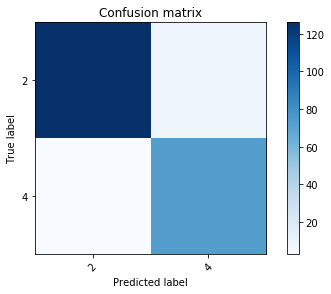

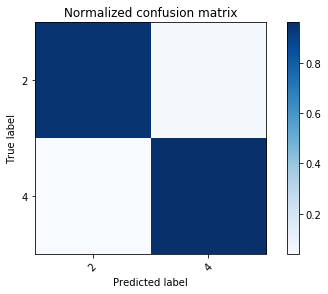

In [8]:
# Calculation and graphical representation of the confusion matrix

# definition of a helper function (taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# get the target labels (it is an output from the classifier)
target_names=RF_classifier.classes_

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(test_y, mypredtest)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Getting the best predictors of the cancer class (benign=2/malign=4)

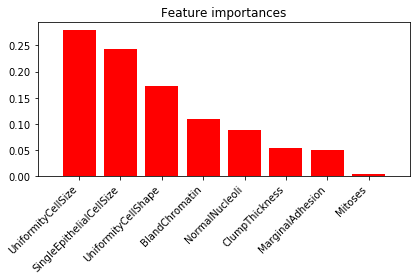

In [9]:
# Get feature importance

importances=RF_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the name of each features
feature_list=np.array(features.columns[0:9])

# Visualize
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_x.shape[1]), feature_list[indices],rotation=45,horizontalalignment='right')
plt.xlim([-1, train_x.shape[1]])
plt.tight_layout()
plt.show()